# Zipf's Law Analysis

In [44]:
import chess
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from collections import Counter
from datasets import load_dataset
import tqdm
import seaborn as sns
sns.set_theme()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing the datasets

In [2]:
from nlpChess.utils.DatasetLoader import loadConcatenatedDataset
ds = loadConcatenatedDataset()
df = ds.to_pandas()

In [3]:
conn = sqlite3.connect("chess_games.db")
cursor = conn.cursor()

## Zipf's Law for the moves

In [4]:
df.head()

,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__
0,"[e2e4, g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e...",CHECKMATE,1-0,"[p, p, n, b, p, p, b, p, b, n, p, p, n, p, b, ...","[, , , , , , , , , , p, p, , , , , , , , , p, ...","[False, False, False, False, False, False, Fal...","[g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e5, c1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",75721
1,"[e2e4, c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e...",CHECKMATE,0-1,"[p, p, p, p, p, n, p, p, b, p, n, p, n, p, n, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e5, f1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",80184
2,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",INSUFFICIENT_MATERIAL,1/2-1/2,"[p, p, n, p, p, p, n, n, n, p, b, p, p, q, p, ...","[, , , , , p, p, , , , , , , , , , , , , , , q...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",19864
3,"[d2d4, d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g...",CHECKMATE,0-1,"[p, p, n, n, p, p, p, b, n, p, b, k, p, p, p, ...","[, , , , , , , , , , , , , , p, p, q, q, p, , ...","[False, False, False, False, False, False, Fal...","[d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g7, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",76699
4,"[e2e4, g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g...",CHECKMATE,0-1,"[p, p, p, p, p, p, p, b, b, p, n, n, b, b, q, ...","[, , , , , , p, , , , , , , , , n, b, p, p, , ...","[False, False, False, False, False, False, Fal...","[g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g7, c1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",92991


In [5]:
def removeFifthChar(string):
    if len(string) < 5:
        return string
    return string[:4]

#Apply the function to the 'moves' column
df['moves'] = df['Moves'].apply(removeFifthChar)

In [6]:
len_games = df['Moves'].apply(len)
len_games

0        163
1        134
2        334
3        126
4        164
        ... 
99995    122
99996    116
99997    289
99998    159
99999    246
Name: Moves, Length: 100000, dtype: int64

In [7]:
# Get all the performed moves
# Concatenate all moves from all games into a single list
moves = [move for game in df['Moves'] for move in game]

In [8]:
# Count the occurrences of each move
move_counts = Counter(moves)

# Sort the moves by frequency
sorted_move_counts = move_counts.most_common()
move_ranks = range(1, len(sorted_move_counts) + 1)
move_frequencies = [count for fen, count in sorted_move_counts]


Plot the Zipf's Law for moves

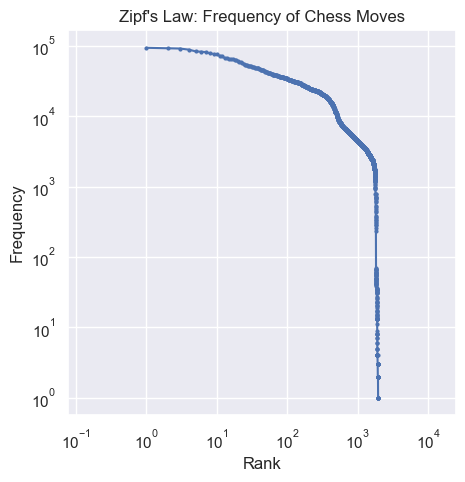

In [9]:
plt.figure(figsize=(5, 5))
plt.loglog(move_ranks, move_frequencies, marker='o', markersize=2)
plt.title("Zipf's Law: Frequency of Chess Moves")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.axis('equal') 
plt.show()


### Compute the exponent of the Zipf's Law 

$f(r) = \frac{C}{r^s}$

where f(r) is the frequency of the word at rank r, C is a constant, and s is the Zipf exponent.

The Zipf's exponent is useful for analysis since:
- s<1: The distribution flattens. Frequencies are more evenly spread across ranks, indicating a more uniform distribution of items.
- s=1: The classic Zipfian case. The second-ranked item occurs half as frequently as the first, and so on. This implies that a few words are extremely common, and many are rare.
- s>1: The distribution is steeper.
    High-ranked items dominate, and lower-ranked items become significantly rare. 
    This suggests a system where a few elements are overwhelmingly prevalent.



In [10]:
log_move_ranks = np.log(move_ranks)
log_move_freqs = np.log(move_frequencies)
move_coeffs = np.polyfit(log_move_ranks, log_move_freqs, 1)
move_slope = move_coeffs[0]
print(f"Estimated Zipf exponent for moves: {abs(move_slope):.2f}")

Estimated Zipf exponent for moves: 1.28


This exponent is extremely similar to a natural language!
Let's try to compare it to a natural language taking the Zipf's law exponent of some Shakespear's writings as a benchmark

In [11]:
from nlpChess.utils.DatasetLoader import loadConcatenatedShakespeareDataset
dsShakespeare = loadConcatenatedShakespeareDataset()
dfShakespeare = dsShakespeare.to_pandas()
dfShakespeare.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,19217,19218,Antony and Cleopatra,9.0,2.1.33,POMPEY,"How now, Varrius!"
1,99413,99414,Troilus and Cressida,32.0,1.2.66,CRESSIDA,"Ay, if I ever saw him before and knew him."
2,104667,104668,Twelfth Night,86.0,3.4.193,VIOLA,With the same 'havior that your passion bears
3,41989,41990,Henry VIII,41.0,3.2.121,SUFFOLK,"May be, he hears the king"
4,36553,36554,Hamlet,119.0,5.2.312,HAMLET,"Nay, come, again."


In [15]:
lines = dfShakespeare['PlayerLine'].tolist()
lines = ' '.join(lines)
lines[:500]

"How now, Varrius! Ay, if I ever saw him before and knew him. With the same 'havior that your passion bears May be, he hears the king Nay, come, again. Nor in a way so chaste, since my desires My lord, Fie on sinful fantasy! I warrant thee. Of ill-shaped fishes, and about his shelves Prithee, do, Jack. So bad an instrument: his name's Parolles. Your franchises, whereon you stood, confined The rest is labour, which is not used for you: Hot, hot, and moist: this hand of yours requires Why might not"

Tokenization

In [16]:
shakespearWritings = lines.split()

Zipf's Law

In [17]:
word_counts = Counter(shakespearWritings)
# Sort the words by frequency
sorted_word_counts = word_counts.most_common()
word_ranks = range(1, len(sorted_word_counts) + 1)
word_frequencies = [count for word, count in sorted_word_counts]


Plot

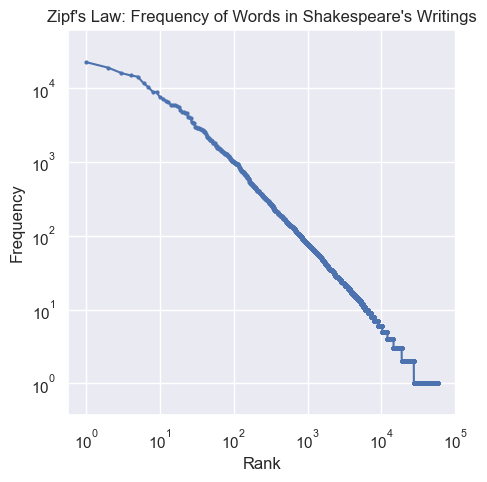

In [19]:
plt.figure(figsize=(5, 5))
plt.loglog(word_ranks, word_frequencies, marker='o', markersize=2)
plt.title("Zipf's Law: Frequency of Words in Shakespeare's Writings")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.axis('equal')
plt.show()

Zipf's Law Exponent

In [20]:
log_word_ranks = np.log(word_ranks)
log_word_freqs = np.log(word_frequencies)
word_coeffs = np.polyfit(log_word_ranks, log_word_freqs, 1)
word_slope = word_coeffs[0]
print(f"Estimated Zipf exponent in Shakespear's writings: {abs(word_slope):.2f}")

Estimated Zipf exponent in Shakespear's writings: 1.14


Compare on the same plot the chess plot and the Shakespear one

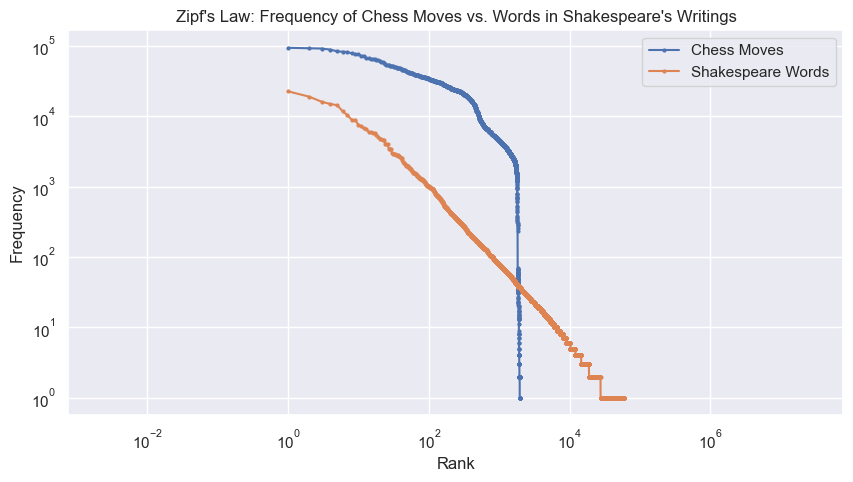

In [22]:
#Compare on the same plot the chess plot and the Shakespear one
plt.figure(figsize=(10, 5))
plt.loglog(move_ranks, move_frequencies, marker='o', label="Chess Moves", markersize=2)
plt.loglog(word_ranks, word_frequencies, marker='o', label="Shakespeare Words", markersize=2)
plt.title("Zipf's Law: Frequency of Chess Moves vs. Words in Shakespeare's Writings")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.axis('equal')
plt.show()

## Zipf's Law for the moves depending on phase of the game

Divide the moves in:
- 10%: opening
- 30%:  midgame
- 31+: endgame

In [25]:
openingLimit = len_games*0.1
midgameLimit = len_games*0.3
endgameLimit = len_games.apply(lambda x:max(x, 31))

In [28]:
df['Opening'] = df.apply(lambda row: row['Moves'][:int(openingLimit.loc[row.name])], axis=1)
df['Midgame'] = df.apply(lambda row: row['Moves'][int(openingLimit.loc[row.name]):int(midgameLimit.loc[row.name])], axis=1)
df['Endgame'] = df.apply(lambda row: row['Moves'][int(midgameLimit.loc[row.name]):int(endgameLimit.loc[row.name])], axis=1)
df.head()


,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__,moves,Opening,Midgame,Endgame
0,"[e2e4, g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e...",CHECKMATE,1-0,"[p, p, n, b, p, p, b, p, b, n, p, p, n, p, b, ...","[, , , , , , , , , , p, p, , , , , , , , , p, ...","[False, False, False, False, False, False, Fal...","[g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e5, c1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",75721,"[e2e4, g7g6, g1f3, f8g7]","[e2e4, g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e...","[d1d2, c6d4, d3c4, c8h3, f3e5, g7e5, f2f4, h3e...","[b2b3, c4e6, b6f2, h8d8, c2c4, d7d2, f4d2, d8d..."
1,"[e2e4, c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e...",CHECKMATE,0-1,"[p, p, p, p, p, n, p, p, b, p, n, p, n, p, n, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e5, f1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",80184,"[e2e4, c7c6, d2d3, d7d6]","[e2e4, c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e...","[a7a5, b1d2, a5a4, g2h3, b7b5, d2f3, b8d7, g3g...","[f2f3, g4e3, c1e3, d4e3, d1e2, c4d3, c2d3, c5b..."
2,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",INSUFFICIENT_MATERIAL,1/2-1/2,"[p, p, n, p, p, p, n, n, n, p, b, p, p, q, p, ...","[, , , , , p, p, , , , , , , , , , , , , , , q...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",19864,"[e2e4, c7c5, g1f3, d7d6]","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...","[e8c8, h4h5, h8g8, h5h6, g7f6, g2g4, b8c6, d4e...","[e4f5, g6f5, a7d7, b4a4, f2f3, a4a3, f3f2, a3a..."
3,"[d2d4, d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g...",CHECKMATE,0-1,"[p, p, n, n, p, p, p, b, n, p, b, k, p, p, p, ...","[, , , , , , , , , , , , , , p, p, q, q, p, , ...","[False, False, False, False, False, False, Fal...","[d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g7, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",76699,"[d2d4, d7d6, g1f3, g8f6]","[d2d4, d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g...","[h2h3, e7e5, d4e5, d6e5, d1d8, f8d8, f3e5, b8a...","[e6c4, d3e5, c4b5, c3c4, b5a4, d1d3, f7f6, d3a..."
4,"[e2e4, g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g...",CHECKMATE,0-1,"[p, p, p, p, p, p, p, b, b, p, n, n, b, b, q, ...","[, , , , , , p, , , , , , , , , n, b, p, p, , ...","[False, False, False, False, False, False, Fal...","[g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g7, c1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",92991,"[e2e4, g7g6, d2d4, d7d5]","[e2e4, g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g...","[g2f3, f6e5, f4e5, g8f6, b1d2, e8g8, b5c6, b7c...","[g2f3, e3f3, f6f3, d1d6, f3f2, b2b3, f8g6, e5e..."


Method to plot Zipf's Law for every phase

In [40]:
all_opening_moves = np.concatenate(df['Opening'].values)
all_midgame_moves = np.concatenate(df['Midgame'].values)
all_endgame_moves = np.concatenate(df['Endgame'].values)

In [42]:
def zipf_plot(move_list, phase_name):
    counter = Counter(move_list)
    frequencies = np.array(sorted(counter.values(), reverse=True))
    ranks = np.arange(1, len(frequencies) + 1)

    plt.plot(np.log(ranks), np.log(frequencies), label=phase_name)
    
    coeffs = np.polyfit(np.log(ranks), np.log(frequencies), 1)
    print(f"{phase_name.capitalize()} Zipf exponent: {-coeffs[0]:.2f}")

Opening Zipf exponent: 2.16
Midgame Zipf exponent: 1.44
Endgame Zipf exponent: 1.18


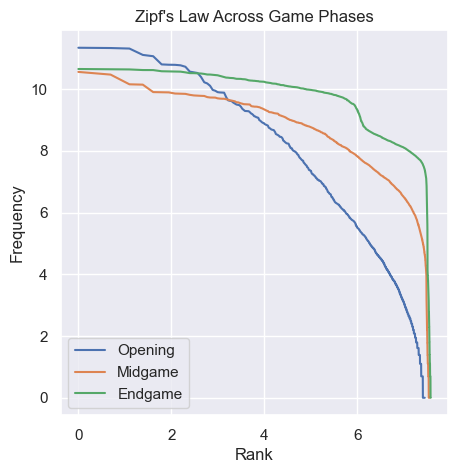

In [43]:
plt.figure(figsize=(5, 5))

zipf_plot(all_opening_moves, "Opening")
zipf_plot(all_midgame_moves, "Midgame")
zipf_plot(all_endgame_moves, "Endgame")

plt.title("Zipf's Law Across Game Phases")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.show()

At this point, since the exponent it's higher in the opening phase due to openings, it is interesting to investigate when the exponent gets close to one during games to try to find the lenght of openings (if the  exponent is close to one there are no few prevalent elements).

In [45]:
def computeZipfExponentPerMoveNumber(df, move_number):
    moves = df['Moves'].apply(lambda x: x[move_number-1] if len(x) >= move_number else None)
    moves = moves.dropna()
    move_counts = Counter(moves)
    sorted_move_counts = move_counts.most_common()
    move_ranks = range(1, len(sorted_move_counts) + 1)
    move_frequencies = [count for move, count in sorted_move_counts]
    log_move_ranks = np.log(move_ranks)
    log_move_freqs = np.log(move_frequencies)
    move_coeffs = np.polyfit(log_move_ranks, log_move_freqs, 1)
    move_slope = move_coeffs[0]
    return abs(move_slope)

maxLegths = max(len_games)
zipf_exponents = []
for move_number in tqdm.tqdm(range(1, maxLegths + 1)):
    exponent = computeZipfExponentPerMoveNumber(df, move_number)
    zipf_exponents.append(exponent)

100%|██████████| 833/833 [00:21<00:00, 38.78it/s]


Source for Zipf's Law exponent for natural languages: [here](https://www.sciencedirect.com/science/article/pii/S0375960117305388)

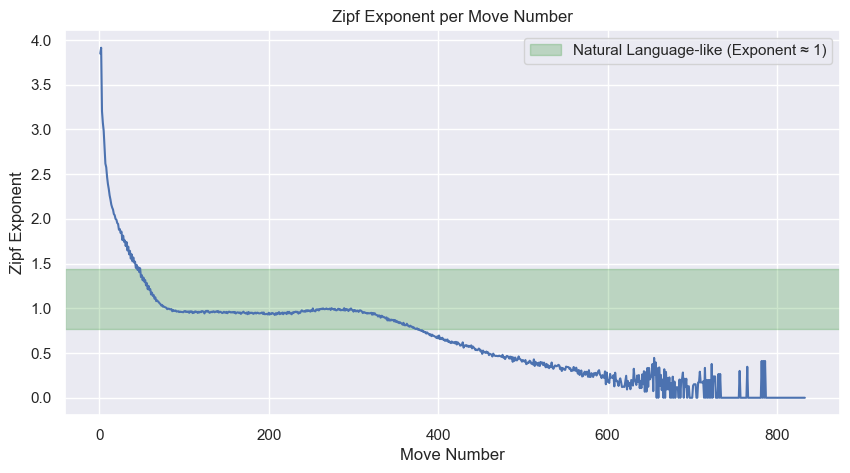

In [51]:
#Plot the Zipf exponents
plt.figure(figsize=(10, 5))
plt.plot(range(1, maxLegths + 1), zipf_exponents, markersize=2)
plt.title("Zipf Exponent per Move Number")
plt.xlabel("Move Number")
plt.ylabel("Zipf Exponent")
plt.axhspan(0.77, 1.44, color='green', alpha=0.2, label='Natural Language-like (Exponent ≈ 1)')
plt.legend()
plt.show()

In [19]:
df = pd.read_sql_query("SELECT game_id, move_number, move FROM moves", conn)


In [20]:
#count the number of moves in each game
df['move_count'] = df.groupby('game_id')['move'].transform('count')
df['move_count'] = df['move_count'].astype(int)

In [21]:
df.drop_duplicates(subset=['game_id', 'move_count'], inplace=True)
df.drop(columns=['move_number', 'move'], inplace=True)
df

,game_id,move_count
0,1,198
198,2,147
345,3,118
463,4,267
730,5,237
...,...,...
18951038,99996,163
18951201,99997,171
18951372,99998,82
18951454,99999,150
